In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

Function for mapping the target column to numerical values needed for decision tree

In [2]:
def encode_target(df, target_column):
    """Add column to dataframe with integers for the target.

    Args
    ----
    df -- pandas DataFrame.
    target_column -- column to map to int, producing
                     new Target column.

    Returns
    -------
    df_mod -- modified DataFrame.
    targets -- list of target names.
    """
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Mushrooms Dataset

In [54]:
mushroom = pd.read_csv("mushroom_numerical.csv")

In [55]:
mushrooms, targets_mush = encode_target(mushroom, "Class")

In [56]:
target_names_mush = ['p', 'e']

In [57]:
print("mushrooms.head()", mushrooms[["Target", "Class"]].head(),
      sep="\n", end="\n\n")
print("mushrooms.tail()", mushrooms[["Target", "Class"]].tail(),
      sep="\n", end="\n\n")
print("mushroom targets", targets_mush, sep="\n", end="\n\n")

mushrooms.head()
   Target Class
0       0     p
1       1     e
2       1     e
3       0     p
4       1     e

mushrooms.tail()
      Target Class
5639       1     e
5640       1     e
5641       1     e
5642       0     p
5643       0     p

mushroom targets
['p' 'e']



In [48]:
features_mush = list(mushrooms.columns[:21])
print("mushroom features:", features_mush, sep="\n")

mushroom features:
['Cap-shape', ' Cap-surface', ' Cap-color', ' Bruises', ' Odor', ' Gill-attachment', ' Gill-spacing', ' Gill-size', ' Gill-color', ' Stalk-shape', ' Stalk-root', ' Stalk-surface-above-ring', ' Stalk-surface-below-ring', ' Stalk-color-above-ring', ' Stalk-color-below-ring', ' Veil-type', ' Veil-color', ' Ring-number', ' Ring-type', ' Spore-print-color', ' Population']


In [49]:
y_mush = mushrooms["Class"]
X_mush = mushrooms[features_mush]
X_train_mush, X_test_mush, y_train_mush, y_test_mush = train_test_split(X_mush, y_mush, test_size=0.33, random_state=42)

In [50]:
dt_model_mush = DecisionTreeClassifier(max_depth=3)
dt_model_mush.fit(X_train_mush, y_train_mush)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
y_pred_mush = dt_model_mush.predict(X_test_mush)
dt_model_mush.feature_importances_   # Fifth feature almost splits perfectly the samples that's why there is 0.998
                                     # accuracy. Consider dropping this feature

array([0.        , 0.        , 0.        , 0.        , 0.94303746,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05696254,
       0.        ])

In [52]:
print("Confusion matrix - Mushroom dataset:", confusion_matrix(y_test_mush, y_pred_mush),
      sep="\n", end="\n\n")  
print("Classification report - Mushroom dataset:", classification_report(y_test_mush, y_pred_mush),
      sep="\n", end="\n\n") 
print("Accuracy score - Mushroom dataset:", accuracy_score(y_test_mush, y_pred_mush),
      sep="\n", end="\n\n")

Confusion matrix - Mushroom dataset:
[[1166    0]
 [   3  694]]

Classification report - Mushroom dataset:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1166
           p       1.00      1.00      1.00       697

   micro avg       1.00      1.00      1.00      1863
   macro avg       1.00      1.00      1.00      1863
weighted avg       1.00      1.00      1.00      1863


Accuracy score - Mushroom dataset:
0.998389694041868



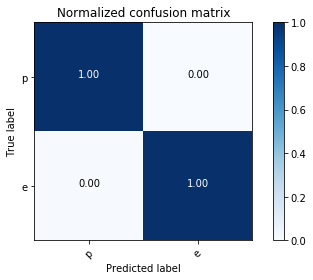

In [53]:
cnf_matrix = confusion_matrix(y_test_mush, y_pred_mush)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names_mush, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

### Poker Dataset

In [12]:
poker = pd.read_csv("poker.csv")

In [31]:
target_names_poker = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
features_poker = list(poker.columns[:10])
print("poker features:", features_poker, sep="\n")

poker features:
['S1', ' C1', ' S2', ' C2', ' S3', ' C3', ' S4', ' C4', ' S5', ' C5']


In [14]:
y_poker = poker["Class"]
X_poker = poker[features_poker]
X_train_poker, X_test_poker, y_train_poker, y_test_poker = train_test_split(X_poker, y_poker, test_size=0.33, random_state=42)

In [15]:
dt_model_poker = DecisionTreeClassifier()
dt_model_poker.fit(X_train_poker, y_train_poker)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
y_pred_poker = dt_model_poker.predict(X_test_poker)
dt_model_poker.feature_importances_

array([0.05522659, 0.13288361, 0.05944686, 0.16059763, 0.05747582,
       0.13201928, 0.05892257, 0.14718948, 0.05668936, 0.1395488 ])

In [17]:
print("Confusion matrix - Poker dataset:", confusion_matrix(y_test_poker, y_pred_poker),
      sep="\n", end="\n\n")  
print("Classification report - Poker dataset:", classification_report(y_test_poker, y_pred_poker),
      sep="\n", end="\n\n") 
print("Accuracy score - Poker dataset:", accuracy_score(y_test_poker, y_pred_poker),
      sep="\n", end="\n\n")

Confusion matrix - Poker dataset:
[[121612  44205   2063    796    114    688     17      1      0      0]
 [ 41230  87005   9815   3522    779    173    180     17      2      1]
 [  1631   8613   5208    511    128      2    164     20      0      0]
 [   616   2985    543   2769     50      3    166     21      0      0]
 [   121    702     99     71    348      0      3      1      1      0]
 [   463    110      3      0      0    117      0      0      0      0]
 [     8    112    154    118      4      0     68      2      0      0]
 [     1     15     13     32      1      0      6     17      0      0]
 [     0      6      2      0      1      1      0      0      0      0]
 [     0      0      0      1      1      1      0      0      0      0]]

Classification report - Poker dataset:
              precision    recall  f1-score   support

           0       0.73      0.72      0.73    169496
           1       0.61      0.61      0.61    142724
           2       0.29      0.3

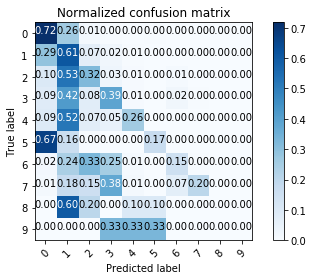

In [32]:
cnf_matrix = confusion_matrix(y_test_poker, y_pred_poker)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names_poker, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

### Nursery Dataset

In [33]:
nurse = pd.read_csv("nursery_numerical.csv")

In [34]:
target_names_nursery = ['very_recom' 'priority', 'spec_prior', 'recommend', 'not_recom']

In [35]:
nursery, targets_nurse = encode_target(nurse, "Class")

In [36]:
print("nursery.head()", nursery[["Target", "Class"]].head(),
      sep="\n", end="\n\n")
print("nursery.tail()", nursery[["Target", "Class"]].tail(),
      sep="\n", end="\n\n")
print("nursery targets", targets_nurse, sep="\n", end="\n\n")

nursery.head()
   Target       Class
0       0   recommend
1       1   not_recom
2       2    priority
3       2    priority
4       2    priority

nursery.tail()
       Target        Class
12955       1    not_recom
12956       1    not_recom
12957       4   spec_prior
12958       4   spec_prior
12959       1    not_recom

nursery targets
[' recommend' ' not_recom' ' priority' ' very_recom' ' spec_prior']



In [37]:
features_nurse = list(nursery.columns[:8])
print("nursery features:", features_nurse, sep="\n")

nursery features:
['Parents', ' Has_nurs', ' Form', ' Children', ' Housing', ' Finance', ' Social', ' Health']


In [38]:
y_nurse = nursery["Class"]
X_nurse = nursery[features_nurse]
X_train_nurse, X_test_nurse, y_train_nurse, y_test_nurse = train_test_split(X_nurse, y_nurse, test_size=0.33, random_state=42)

In [39]:
dt_model_nurse = DecisionTreeClassifier(max_depth=4)
dt_model_nurse.fit(X_train_nurse, y_train_nurse)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
y_pred_nurse = dt_model_nurse.predict(X_test_nurse)
dt_model_nurse.feature_importances_

array([0.15471328, 0.38606291, 0.        , 0.        , 0.04248366,
       0.02278821, 0.        , 0.39395194])

In [41]:
print("Confusion matrix - Nursery dataset:", confusion_matrix(y_test_nurse, y_pred_nurse),
      sep="\n", end="\n\n")  
print("Classification report - Nursery dataset:", classification_report(y_test_nurse, y_pred_nurse),
      sep="\n", end="\n\n") 
print("Accuracy score - Nursery dataset:", accuracy_score(y_test_nurse, y_pred_nurse),
      sep="\n", end="\n\n")


Confusion matrix - Nursery dataset:
[[1146    0    0  291    0]
 [ 591  672    0  133    0]
 [   0    1    0    0    0]
 [ 570  108    0  663    0]
 [   0  102    0    0    0]]

Classification report - Nursery dataset:
              precision    recall  f1-score   support

   not_recom       0.50      0.80      0.61      1437
    priority       0.76      0.48      0.59      1396
   recommend       0.00      0.00      0.00         1
  spec_prior       0.61      0.49      0.55      1341
  very_recom       0.00      0.00      0.00       102

   micro avg       0.58      0.58      0.58      4277
   macro avg       0.37      0.35      0.35      4277
weighted avg       0.61      0.58      0.57      4277


Accuracy score - Nursery dataset:
0.580079494973112



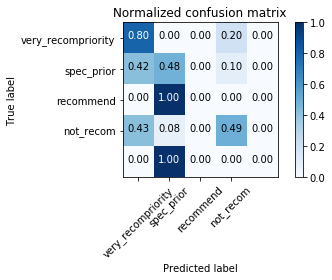

In [42]:
cnf_matrix = confusion_matrix(y_test_nurse, y_pred_nurse)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names_nursery, normalize=True,
                      title='Normalized confusion matrix')
plt.show()